<center>
    <b> Jerry (Yung-Chieh) Chan <br> A15872251 </b>
</center>

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
from seaborn import scatterplot
import seaborn as sns


# DBSCAN Algorithm

In [2]:
dist = np.matrix([
    [0,2,2,5,6],
    [2,0,2,3,7],
    [2,2,0,3,6],
    [5,3,3,0,7],
    [6,7,6,7,0]
])
eps = 4
minpt = 3

In [3]:
mdl = DBSCAN(eps, minpt, "precomputed")

In [4]:
mdl.fit(dist)

DBSCAN(algorithm='auto', eps=4, leaf_size=30, metric='precomputed',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [5]:
mdl.labels_

array([ 0,  0,  0,  0, -1])

## (a)
One cluster is formed {A,B,C,D} \
One point is labeled as noise {E}

* Process:
  * Point A: there are 3 points within the epsilon nbhd. A labeled as a core of cluster 0, next process its neighbors: B, C
  * Point B: there are 4 points within the epsilon nbhd. B labeled as a core of cluster 0, add its neighbors to the  processing queue: D
  * Point C: there are 4 points within the epsilon nbhd. C labeled as a core of cluster 0, its neighbors are all processed or in the queue
  * Point D: there are 3 points within the epsilon nbhd. D labeled as a core of cluster 0, its neighbors are all processed
  * Point E: there are 1 points within the epsilon nbhd. E labeled as a noise.
* Result:
  * Point A, B, C, D form cluster 0
  * Point E is a noise

## (b)
In DBSCAN algorithm, we don't need to know the number of clusters. If we are using a K mean algorithm and set a wrong number of clusters, for example 3. The noise point E will be labeled as a cluster and cluster {A, B, C, D} might be separate to two clusters. Even if we set the correct k, the centriod will be wrongly placed in the mean point of all points. In sum K mean is sensitive to outlier and requires a knowledge of the number of clusters

# Association Rule Mining

## (a)
* Single
  * Titanic: s = 0.6
  * A star is born: s = 0.6
  * Crazy Rich Asians: s = 1
  * Inception: s = 0.6

Frequent patterns will only be the union of those movies
  
* 2-Tuples
  * (Titanic, Crazy Rich Asians): s = 3/5 = 0.6 > 0.5
  * (A star is born, Crazy Rich Asians): s = 3/5 = 0.6 > 0.5
  * (Inception, Crazy Rich Asians): s = 3/5 = 0.6 > 0.5
 
* 3-Tuples
  * There are no frequent 3-tuple since there are no 3-tuples that all its subsets are frequent.

## (b)
* (Titanic, Crazy Rich Asians): s = 0.6
  * Titanic -> Crazy Rich Asians: c = 1
  * Crazy Rich Asians -> Titanic: c = 0.6
* (A star is born, Crazy Rich Asians): s = 0.6
  * A star is born -> Crazy Rich Asians: c = 1
  * Crazy Rich Asians -> A star is born: c = 0.6
* (Inception, Crazy Rich Asians): s = 0.6
  * Inception -> Crazy Rich Asians: c = 1
  * Crazy Rich Asians -> Inception: c = 0.6
  
All the rules formed by frequent patterns has c >= 0.6 

Result: 
* Titanic -> Crazy Rich Asians
* Crazy Rich Asians -> Titanic
* A star is born -> Crazy Rich Asians
* Crazy Rich Asians -> A star is born
* Inception -> Crazy Rich Asians
* Crazy Rich Asians -> Inception

# PCA

![img](PCA.png)

## (b)
Yes it's possible to separate the data points with a threshold function after projecting them on one of the PCs.
* For dataset-1, we can project data points on PC1. One category will lay on left side of PC1 and the other will lay on the right side.

* For dataset-2, we can project data points on PC2. One category will lay on upper side of PC2 and the other will lay on the lower side of PC2.

# PCA, K-Means, and GMM Clustering

## (a)

In [2]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = iris.drop(columns = ["Id","Species"])
y = iris["Species"].copy()

In [6]:
sclr = StandardScaler()
X_standardized = sclr.fit_transform(X)

## (b)

In [7]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_standardized)

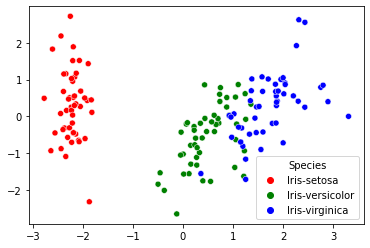

In [8]:
scatterplot(x = X_reduced[:,0], y = X_reduced[:,1], hue = y,
            palette = {"Iris-virginica":"b", "Iris-setosa":"r", "Iris-versicolor":"g" })

## (c)

In [11]:
gmm = GaussianMixture(n_components=3, n_init = 10)
gmm.fit(X_standardized)
gmm_pred = gmm.predict(X_standardized)

In [12]:
adjusted_rand_score(gmm_pred, y)

0.9038742317748124

## (d)

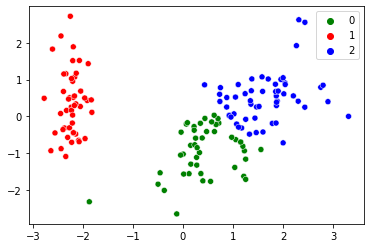

In [18]:
km = KMeans(n_clusters = 3, n_init = 10)
km.fit(X_standardized)
km_pred = km.predict(X_standardized)

In [14]:
adjusted_rand_score(km_pred, y)

0.6201351808870379

## (e)

In [15]:
sns.set_palette("hls")

<b> Target </b>

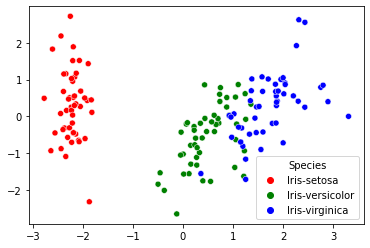

In [16]:
scatterplot(x = X_reduced[:,0], y = X_reduced[:,1], hue = y,
            palette = {"Iris-virginica":"b", "Iris-setosa":"r", "Iris-versicolor":"g" })

<b> GMM Result </b>

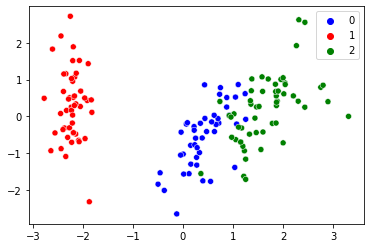

In [17]:
scatterplot(x = X_reduced[:,0], y = X_reduced[:,1], hue = gmm_pred, palette=['b','r','g'])

<b> KMeans Result </b>

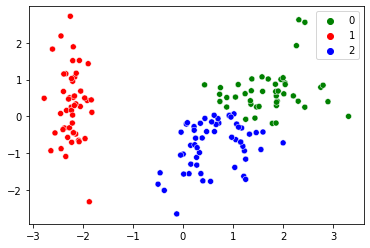

In [12]:
scatterplot(x = X_reduced[:,0], y = X_reduced[:,1], hue = km_pred, palette=['g','r','b'])

GMM scores 90 and KMeans scores 62 under Rand Index. From the plots above, we can see the result predicted by GMM is very similar to the true label. KMeans got most of the data points right but failed on the boundary between `Iris-virginica` and `Iris-versicolor`.

* KMeans algorithm gives the same weights to all features (when calculating the distance), limiting the complexity of the model's clusters. GMM, with different covariance matrixs, are able to achieve more complex clusters. Therefore, GMM are able to form a better boundary between two attached clusters.

In [52]:
X = np.array([[0,0],[0,1],[1,0],[1,1],[2,1.5]])

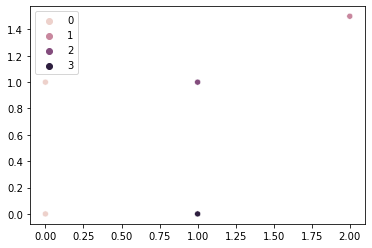

In [53]:
km = KMeans(n_clusters = 4, n_init = 1)
km.fit(X)
km_pred = km.predict(X)
scatterplot(x = X[:,0], y = X[:,1], hue = km_pred)

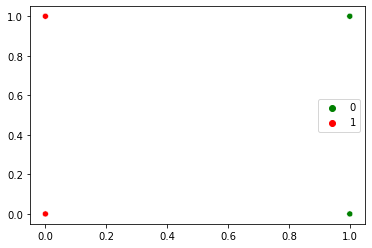